In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
start=pd.read_csv("D:\\50_Startups.csv")

In [3]:
start.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
#EDA and Visualization
start.info

<bound method DataFrame.info of     R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida

In [5]:
start.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
start1=start.rename({'R&D Spend':'RD','Marketing Spend':'MS','Administration':'Ad'},axis=1)
start1

,RD,Ad,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [7]:
start1[start1.duplicated()]

,RD,Ad,MS,State,Profit


In [8]:
#Correlation Analysis
start1.corr()

,RD,Ad,MS,Profit
RD,1.000000,0.241955,0.724248,0.972900
Ad,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


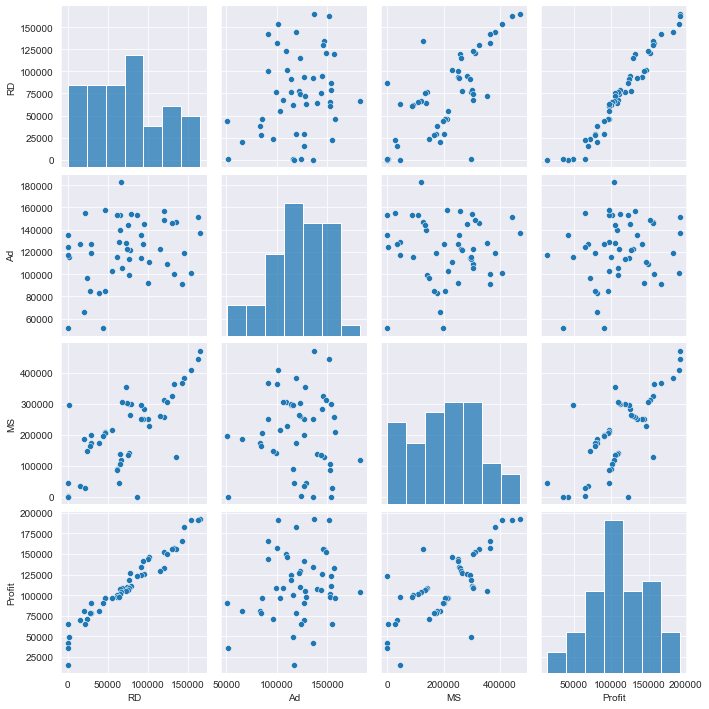

In [9]:
sns.set_style(style='darkgrid')
sns.pairplot(start1)

In [10]:
#Model Building
#finding coefficient params
model=smf.ols('Profit~RD+MS+Ad',data=start1).fit()

In [11]:
#Model Testing
model.params

Intercept    50122.192990
RD               0.805715
MS               0.027228
Ad              -0.026816
dtype: float64

In [13]:
print(model.tvalues, '\n', np.round(model.pvalues,5))

Intercept     7.626218
RD           17.846374
MS            1.655077
Ad           -0.525507
dtype: float64 
 Intercept    0.00000
RD           0.00000
MS           0.10472
Ad           0.60176
dtype: float64


In [14]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [15]:
ml_ms=smf.ols('Profit~MS',data=start1).fit()
print(ml_ms.tvalues, '\n', ml_ms.pvalues)

Intercept    7.808356
MS           7.802657
dtype: float64 
 Intercept    4.294735e-10
MS           4.381073e-10
dtype: float64


In [16]:
ml_ad=smf.ols('Profit~Ad',data=start1).fit()
print(ml_ad.tvalues, '\n', ml_ad.pvalues)

Intercept    3.040044
Ad           1.419493
dtype: float64 
 Intercept    0.003824
Ad           0.162217
dtype: float64


In [17]:
ml_CA=smf.ols('Profit~MS+Ad',data=start1).fit()
print(ml_CA.tvalues, '\n', ml_CA.pvalues)

Intercept    1.142741
MS           8.281039
Ad           2.467779
dtype: float64 
 Intercept    2.589341e-01
MS           9.727245e-11
Ad           1.729198e-02
dtype: float64


In [18]:
rsq_RD=smf.ols('RD~Ad+MS',data=start1).fit().rsquared
vif_RD=1/(1-rsq_RD)

rsq_Ad=smf.ols('Ad~RD+MS',data=start1).fit().rsquared
vif_Ad=1/(1-rsq_Ad)

rsq_MS=smf.ols('MS~RD+Ad',data=start1).fit().rsquared
vif_MS=1/(1-rsq_MS)

# Putting the values in Dataframe format
s1={'Variables':['Rd','Ad','MS'],
    'Vif':[vif_RD,vif_Ad,vif_MS]}
Vif_df=pd.DataFrame(s1)
Vif_df

,Variables,Vif
0,Rd,2.468903
1,Ad,1.175091
2,MS,2.326773


In [19]:
rsq_spend = smf.ols('Spend~Administration+Marketing_Spend',data=start).fit().rsquared  
vif_spend = 1/(1-rsq_spend)

rsq_marketing_spend = smf.ols('Marketing_Spend~Spend+Administration',data=start).fit().rsquared  
vif_marketing_spend = 1/(1-rsq_marketing_spend)

rsq_administration = smf.ols('Administration~Spend+Marketing_Spend',data=start).fit().rsquared  
vif_administration = 1/(1-rsq_administration)

# Storing vif values in a data frame
d1 = {'Variables':['Spend','Administration','Marketing_Spend'],'VIF':[vif_spend,vif_administration,vif_marketing_spend]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Spend,2.468903
1,Administration,1.175091
2,Marketing_Spend,2.326773


In [19]:
import statsmodels.api as sm

In [20]:
#Residual Analysis

#Test for Normality of Residuals (Q-Q Plot)

C:\Users\swami\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


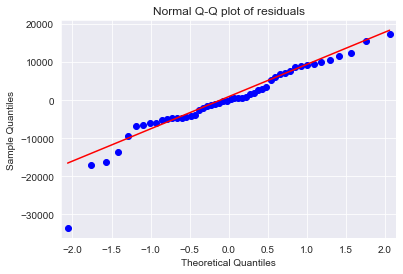

In [21]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [22]:
list(np.where(model.resid>20000))

[array([], dtype=int64)]

In [23]:
list(np.where(model.resid<-20000))

[array([49], dtype=int64)]

In [24]:
#Residual Plot for Homoscedasticity

In [25]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

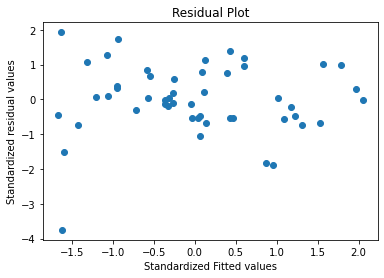

In [25]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [26]:
start1.head(1)

,RD,Ad,MS,State,Profit
0,165349.2,136897.8,471784.1,New York,192261.83


In [26]:
#Residual Vs Regressors

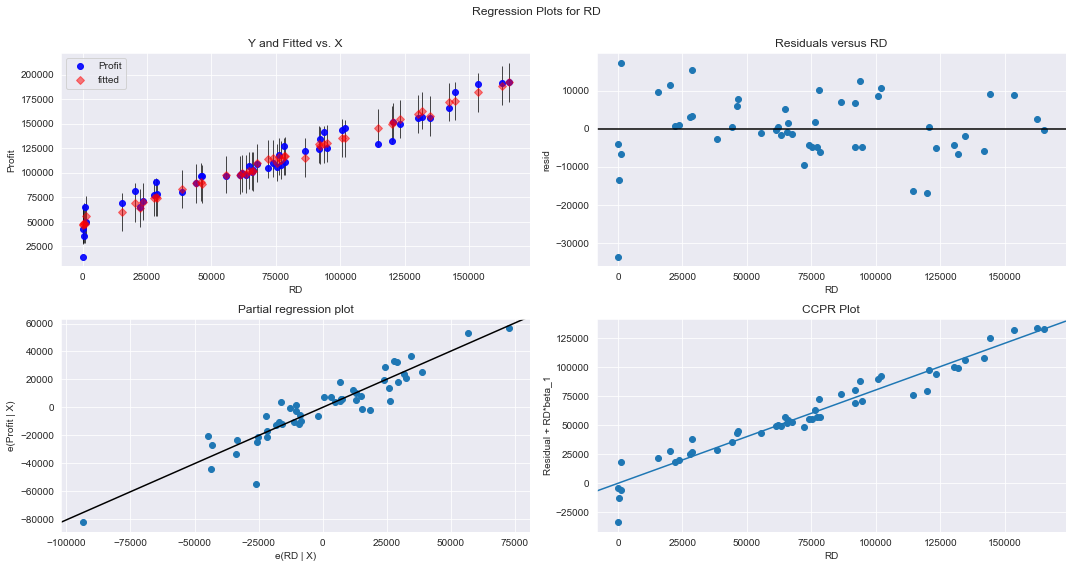

In [27]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RD", fig=fig)
plt.show()

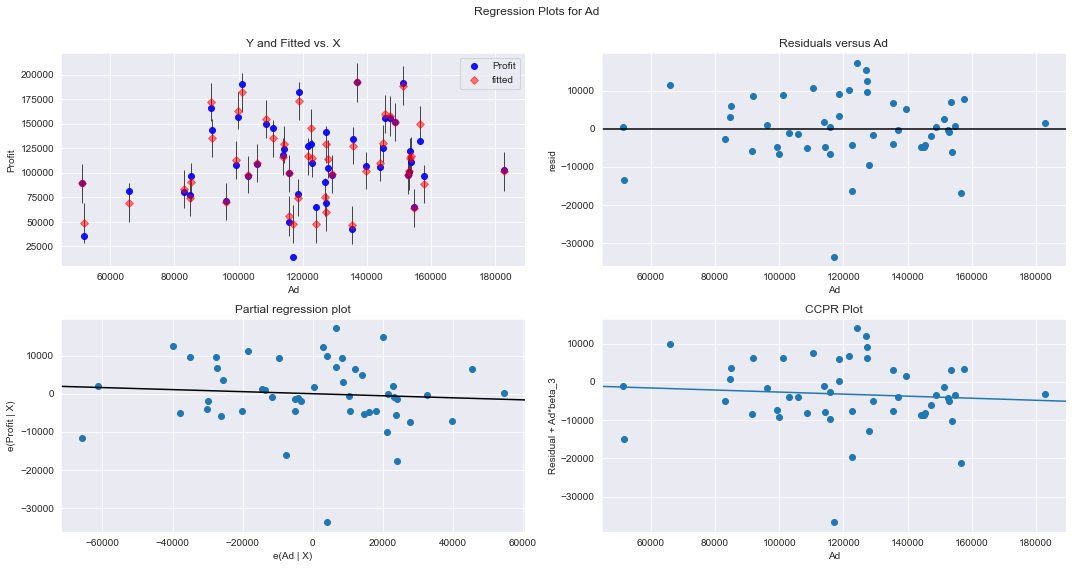

In [28]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Ad", fig=fig)
plt.show()

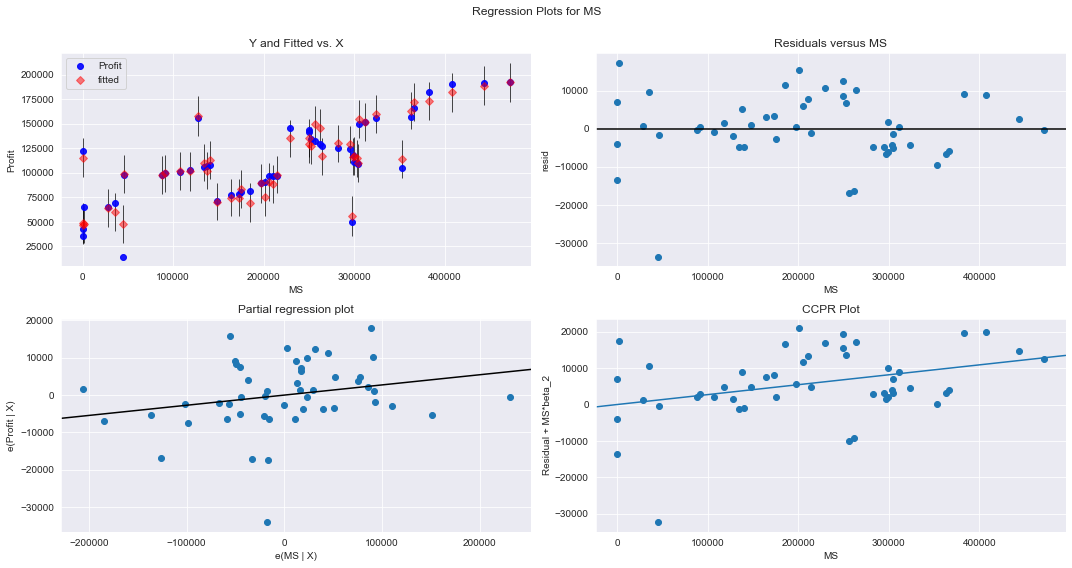

In [29]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MS", fig=fig)
plt.show()

In [30]:
#Model Deletion Diagnostics
#Detecting Influencers/Outliers
#Cook’s Distance
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

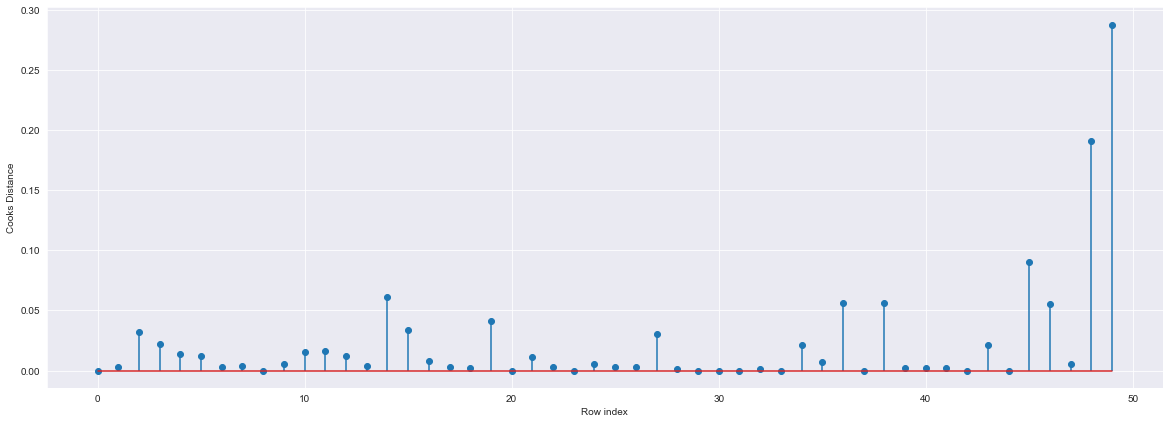

In [31]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(start1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [32]:
#index and value of influencer where c 
(np.argmax(c),np.max(c))

(49, 0.2880822927543268)

In [34]:
#High Influence points

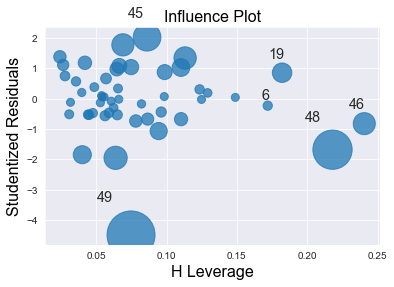

In [33]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [34]:
k = start1.shape[1]
n = start1.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [35]:
#From the above plot, it is evident that data point 48 and 49 are the influencers¶
start1[start1.index.isin([49])]

,RD,Ad,MS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [36]:
start_new=start1.copy()

In [38]:
start2=start_new.drop(start_new.index[[49]],axis=0).reset_index()

In [39]:
start2=start2.drop(['index'],axis=1)

In [40]:
start2

,RD,Ad,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [41]:
final_ml_MS = smf.ols('Profit~RD+MS',data=start2).fit()

In [42]:
(final_ml_MS.rsquared,final_ml_MS.aic)

(0.9610856807456628, 1018.8564801588338)

In [43]:
final_ml_Ad = smf.ols('Profit~RD+Ad',data=start2).fit()

In [44]:
(final_ml_Ad.rsquared,final_ml_Ad.aic)

(0.9584519070123048, 1022.0654576388338)

In [45]:
model_influence_MS = final_ml_MS.get_influence()
(c_MS, _) = model_influence_MS.cooks_distance

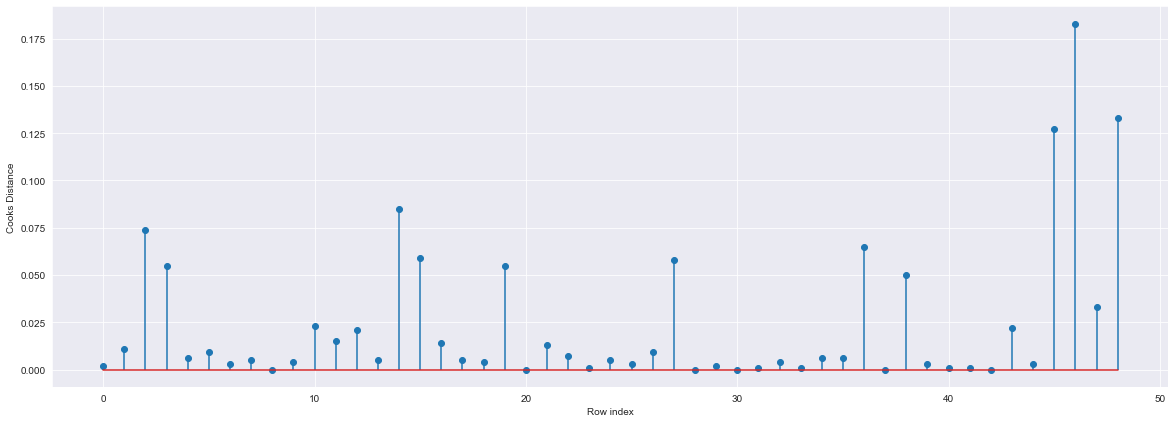

In [46]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(start2)),np.round(c_MS,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [47]:
final_ml_MS = smf.ols('Profit~RD+MS',data=start2).fit()

In [48]:
(final_ml_MS.rsquared,final_ml_MS.aic)

(0.9610856807456628, 1018.8564801588338)

In [49]:
start2.head()

,RD,Ad,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [50]:
new_start=pd.DataFrame({'RD':144372.41,"Ad":118671.85,"MS":383199.62},index=[1])

In [51]:
final_ml_MS.predict(new_start)

1    172246.416164
dtype: float64

In [52]:
pred_y = final_ml_MS.predict(start2)

In [53]:
pred_y

0     190942.726927
1     188043.924520
2     179957.312472
3     172246.416164
4     170022.687457
5     161999.405410
6     157669.178690
7     159705.298181
8     151804.380605
9     153787.521922
10    135096.466868
11    134699.049858
12    129422.677987
13    128049.202655
14    149827.450777
15    145769.611357
16    117530.489091
17    130936.300519
18    129020.306206
19    116793.710748
20    117108.281313
21    118793.642939
22    115484.209637
23    110513.437292
24    113382.099441
25    103711.697086
26    111873.132740
27    115389.649335
28    104243.190309
29    103595.167960
30    100355.932697
31     99610.626757
32    100216.309933
33     98705.145163
34     91568.745065
35     91104.335025
36     77530.715090
37     89363.970985
38     70555.662763
39     84485.861451
40     76823.378730
41     75926.972539
42     72178.031523
43     62783.416125
44     67759.192437
45     50613.086380
46     58959.714353
47     49785.269847
48     50205.566671
dtype: float64

In [ ]:
start3={'Models':['First_Model','Final_Model'],'Rsquared':[model.rsquared]}